In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 
#To make the plots appear inside the notebook

In [6]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
#Assigning numerical value storing it in another column species_N
df['Gender']=lab.fit_transform(df['Gender'])
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [12]:
dat=df
x=dat.drop('Purchased',axis=1)#along with column
print(x)
y=dat['Purchased']


      User ID  Gender  Age  EstimatedSalary
0    15624510       1   19            19000
1    15810944       1   35            20000
2    15668575       0   26            43000
3    15603246       0   27            57000
4    15804002       1   19            76000
..        ...     ...  ...              ...
395  15691863       0   46            41000
396  15706071       1   51            23000
397  15654296       0   50            20000
398  15755018       1   36            33000
399  15594041       0   49            36000

[400 rows x 4 columns]


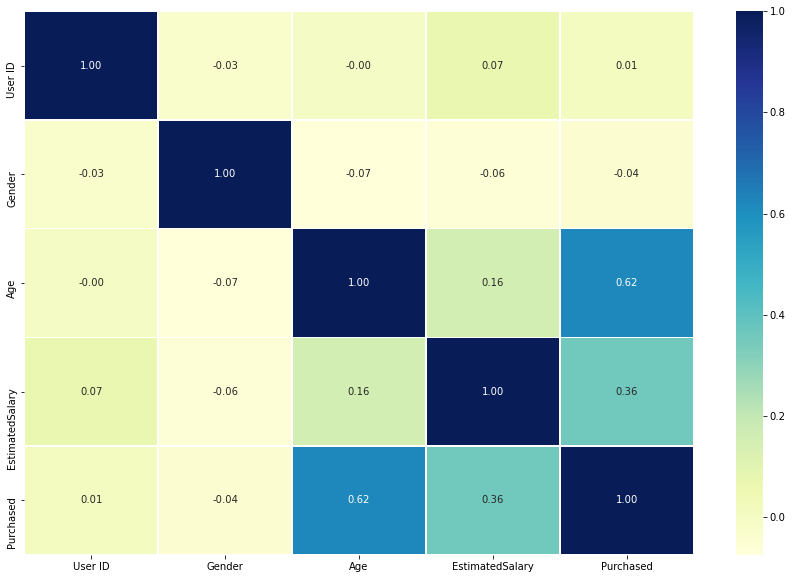

In [16]:
corr_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,10))#actually returns a tuple with 2 elements. First one must be figure object,and the other one a group of subplots
ax=sns.heatmap(corr_mat,
               annot=True,#for value visibility
               linewidths=0.5,
               fmt=".2f",#frequency mean time
               cmap="YlGnBu")# adjusts the colormap used

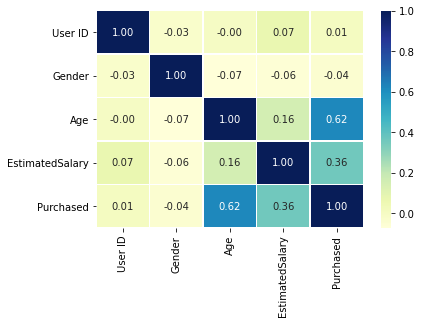

In [17]:
corr_mat=sns.heatmap(df.corr(),
                     annot=True,#for value visibility
                     linewidths=0.5,
                     fmt=".2f",#frequency mean time
                     cmap="YlGnBu")

               

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [29]:
#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
modelstypes={
    "LR":LogisticRegression(),
    "DTC":DecisionTreeClassifier(),
    "RFC":RandomForestClassifier(n_estimators=100),
    "KNN":KNeighborsClassifier(n_neighbors=5),
    "SVC":svm.SVC(kernel='linear'),
    "NBC":GaussianNB()}


In [31]:
def fit_and_score(modelstypes,X_train,X_test,y_train,y_test):
    model_scores={}
    y_predict1={}
    trained_model={}
    for name,model in modelstypes.items():
        #Fit the model to the data
        trained_model[name]=model.fit(X_train,y_train)
        y_predict1[name]=model.predict(X_test)
        #Evaluate the model and append its score to model_scores
        model_scores[name]=model.score(X_test,y_test)
    return model_scores,y_predict1,trained_model

In [32]:
model_scores,predictions,train_model=fit_and_score(modelstypes=modelstypes,
                                                  X_train=X_train,
                                                  X_test=X_test,
                                                  y_train=y_train,
                                                  y_test=y_test)
model_scores

{'LR': 0.76, 'DTC': 0.86, 'RFC': 0.88, 'KNN': 0.8, 'SVC': 0.77, 'NBC': 0.86}

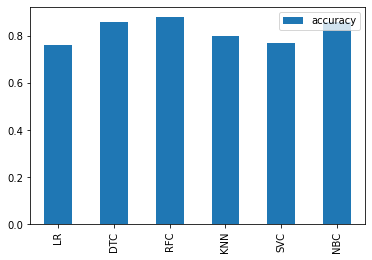

In [33]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar()
plt.show()